#### Avinash Singh :  DataScience and Business Analytics Intern @ The Spark Foundation 

# Importing the Necessary Libraries and the Iris DataSet


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('Iris.csv')


# Visualizing the DataSet

In [2]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(['Id'],axis=1)

In [4]:
df.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

We Conclude that no Null values are present in our Data Set

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


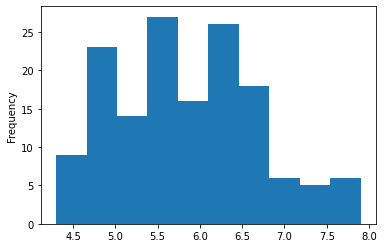

In [11]:
df['SepalLengthCm'].plot.hist()
plt.show()

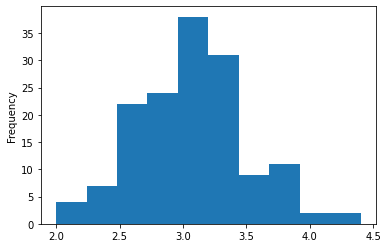

In [12]:
df['SepalWidthCm'].plot.hist()
plt.show()

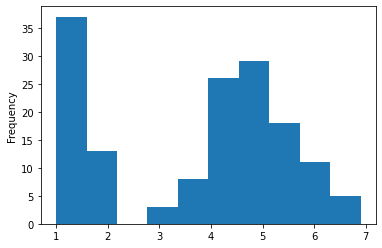

In [13]:
df['PetalLengthCm'].plot.hist()
plt.show()

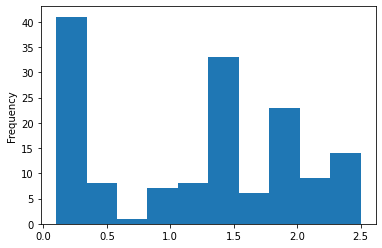

In [14]:
df['PetalWidthCm'].plot.hist()
plt.show()

# PairPlot

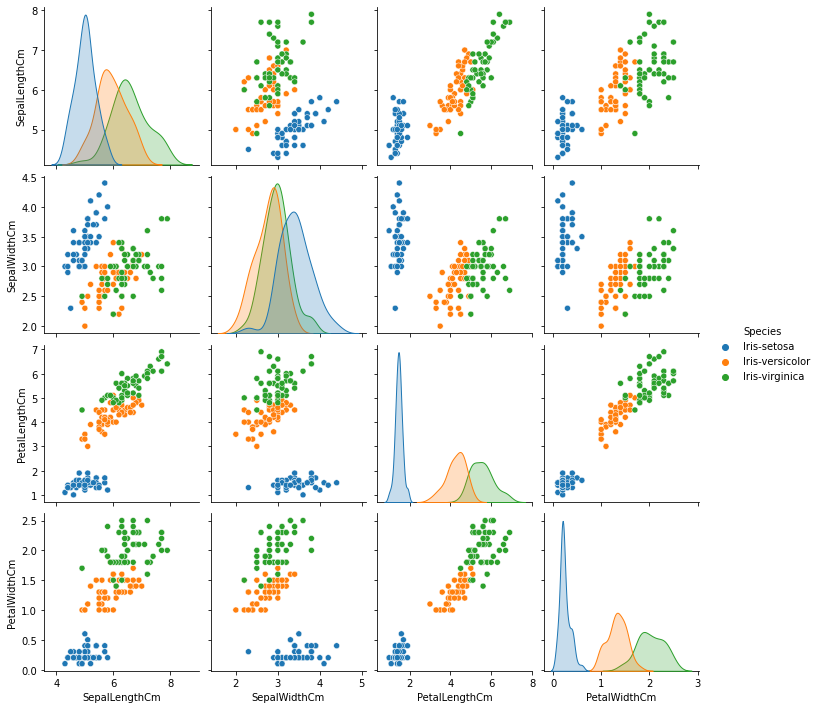

In [15]:
sns.pairplot(df, hue='Species')

# Splitting the Dataset into Train and Test

In [16]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y,test_size=0.3, 
    random_state = 0
)

In [17]:
X_train.shape,Y_train.shape

((105, 4), (105,))

In [18]:
X_test.shape,Y_test.shape

((45, 4), (45,))

# Building the Decision Tree Model 

In [19]:
dt = DecisionTreeClassifier(criterion="gini",random_state=0)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
dt.score(X_test, Y_test)

0.9777777777777777

# Report Analysis 

In [21]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report

In [22]:
#  Training Accuracy
ytrpred = dt.predict(X_train)
print('\n Model Training accuracy : %.4f' % (100*acc(Y_train, ytrpred)))

# Testing Accuracy
ytepred = dt.predict(X_test)
print('\n Model Testing accuracy : %.4f' % (100*acc(Y_test, ytepred)))


 Model Training accuracy : 100.0000

 Model Testing accuracy : 97.7778


# Calculating Precision,Recall and F1-Score  

In [23]:
model_precision = precision_score(Y_test, ytepred,average='weighted')
print('\n Precision Score of the Classifier is : %.4f '%(model_precision))

model_recall = recall_score(Y_test, ytepred,average='weighted')
print('\n Recall Score of the Classifier is : %.4f '%(model_recall))

model_Fscore = f1_score(Y_test, ytepred,average='weighted')
print('\n F1-Score of the Classifier is : %.4f '%(model_Fscore))


 Precision Score of the Classifier is : 0.9796 

 Recall Score of the Classifier is : 0.9778 

 F1-Score of the Classifier is : 0.9779 


# Confusion Matrix of the Model


 Confusion Matrix of the Decision Tree Classifier:


<AxesSubplot:>

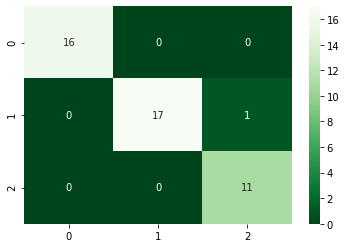

In [24]:
cm = confusion_matrix(Y_test,ytepred)
print('\n Confusion Matrix of the Decision Tree Classifier:')

sns.heatmap(cm,annot = True,cmap='Greens_r', fmt = "d")

# Classification Report for Class Wise Performance Analysis

In [25]:
print(classification_report(Y_test, ytepred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Decision Tree Model

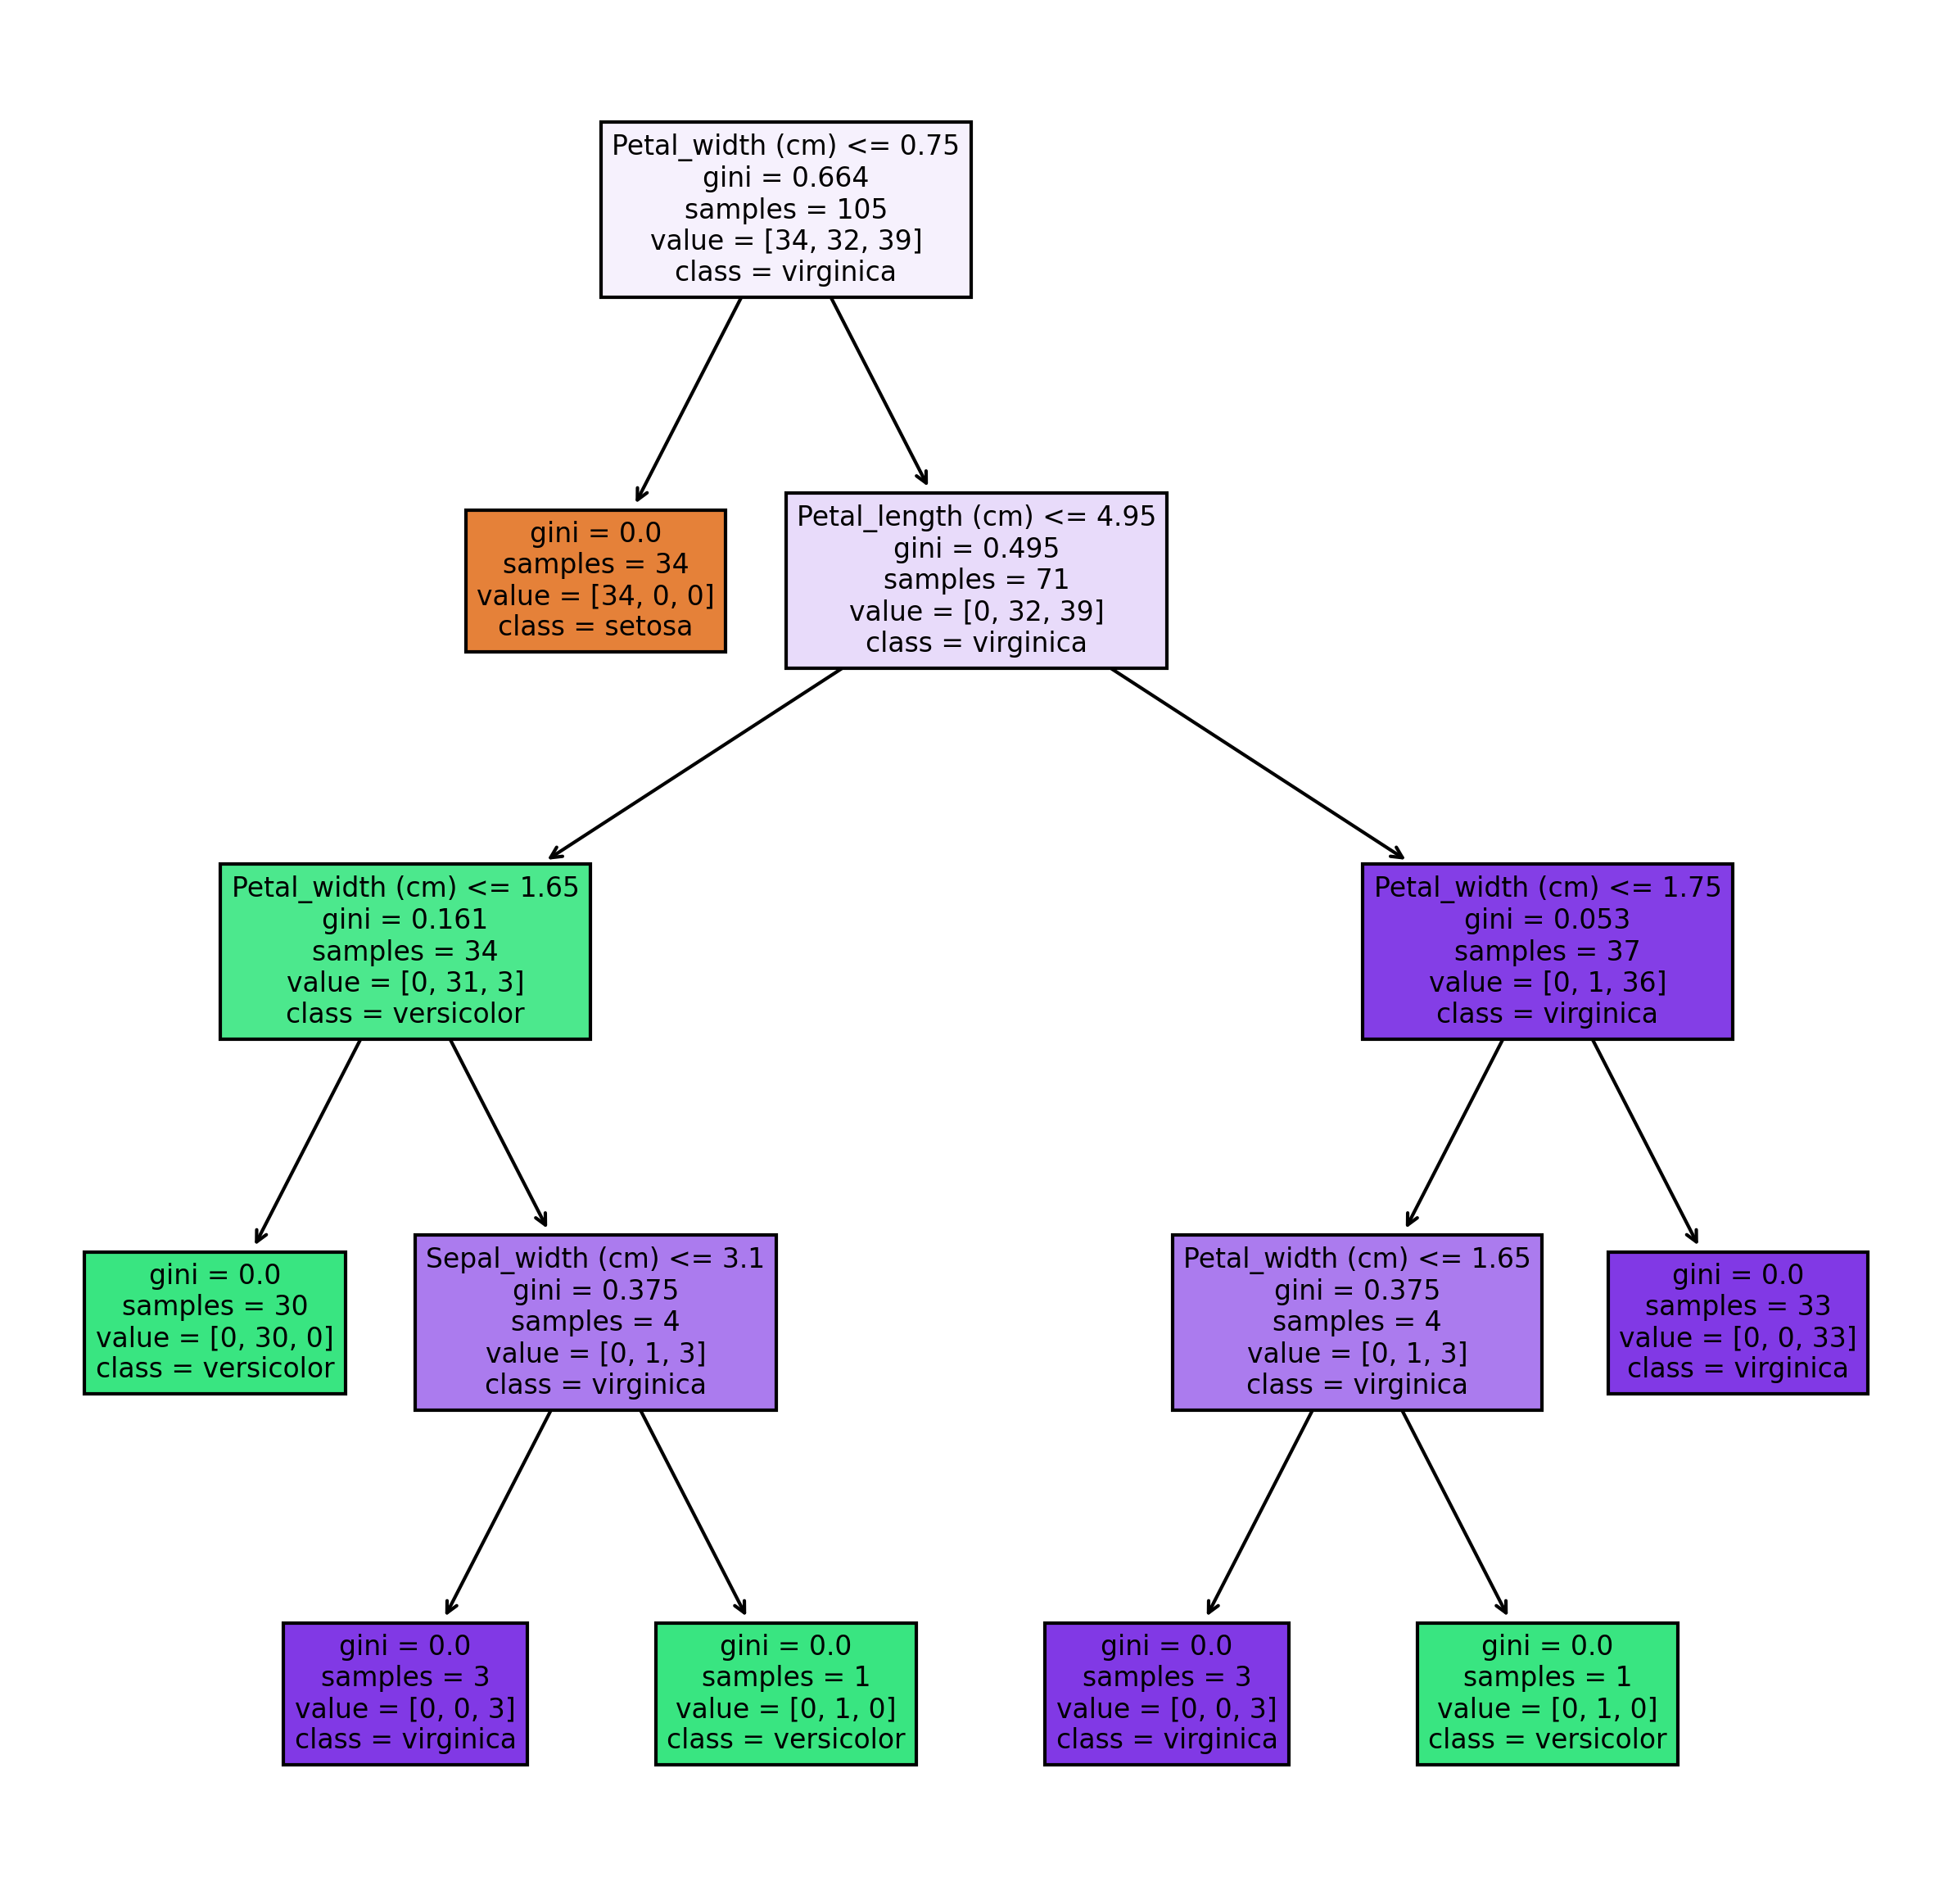

In [26]:
feature_name =['Sepal_length (cm)','Sepal_width (cm)','Petal_length (cm)','Petal_width (cm)']
class_name =['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dt,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True);
fig.savefig('DecisionTree.png')